<a href="https://colab.research.google.com/github/ujjwalbb30/Ujjwal_DATA606/blob/main/notebooks/Step_2_B_Basic_EDA_Text_Ujjwal_PF10610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA 606 : Capstone Project**
##**Course Instructor: Dr. Chaojie Wang**
>**Data Science Department**

>**University of Maryland, Baltimore County**

###**Submitted By: Ujjwal**
>**UMBC ID: PF10610**

##**Basic Exploratory Data Analysis (EDA)**

###**Installing Required Libraries**

In [ ]:
!pip install wordcloud

In [ ]:
!pip install --upgrade gensim

In [ ]:
!pip install textblob

In [ ]:
!pip install langid

###**Importing Required Libraries**

In [ ]:
# importing required dependencies

# importing pandas, numpy, random, matplotlib and their required modules
import pandas as pd
import numpy as np
import random
from numpy.random import seed
seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# importing other required libraries
from tqdm.notebook import tqdm
from wordcloud import WordCloud, STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
from langid.langid import LanguageIdentifier, model

###**Mounting the Drive**

In [ ]:
# mounting the drive to access data files
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# defining the path of data in drive (path to copy the data from)
# defining the path where the data should be copied
drive_path = '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset'
local_path = '/content'

# copying the data from drive to machine
!cp -av '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' '/content'

In [ ]:
# importing the dataframe
imgpath_text_df = pd.read_csv('/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Data_2/imgpath_text_df.csv')
display(imgpath_text_df)

,label,path,text,clean_text
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...
...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...


In [ ]:
# checking NaNs and replacing any with ' ' string
print('Number of NaN values in clean_text column:\n',imgpath_text_df['clean_text'].isnull().sum())

# filling NaNs with ' '
imgpath_text_df.fillna(' ', inplace=True)

# viewing NaNs again
print('Number of NaN values in clean_text column after replacing:\n',imgpath_text_df['clean_text'].isnull().sum())

Number of NaN values in clean_text column:
 21
Number of NaN values in clean_text column after replacing:
 0


##**Detecting the language of all text**

In [ ]:
# now we will detect the language for each row
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
imgpath_text_df['language'] = [identifier.classify(text)[0] for text in imgpath_text_df['clean_text']]
imgpath_text_df['lang_prob'] = [identifier.classify(text)[1] for text in imgpath_text_df['clean_text']]
display(imgpath_text_df)

,label,path,text,clean_text,language,lang_prob
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g,br,0.965464
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap,gl,0.910893
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.000000
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.000000
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.000000
...,...,...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...,en,1.000000
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...,en,1.000000
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...,en,1.000000
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...,en,1.000000


In [ ]:
# viewing value counts for language column
display(imgpath_text_df['language'].value_counts())

en    3306
la      42
de      39
br      13
lb      13
fr      11
es      10
nl       9
an       9
af       8
tl       6
cy       5
it       5
ro       2
ht       2
da       2
bs       1
gl       1
sl       1
eo       1
pl       1
sq       1
id       1
no       1
zu       1
sv       1
Name: language, dtype: int64


For Note:



en    159
af      5
de      5
br      4
an      4
lb      4
es      3
la      2
fr      2
nl      2
cy      2
it      2
id      1
pl      1
sq      1
sl      1
gl      1
bs      1
eo      1
ro      1
Name: language, dtype: int64


For Form:



en    368
de     26
la     13
lb      7
an      5
br      4
nl      3
fr      3
no      1
es      1
zu      1
Name: language, dtype: int64


For Email:



en    592
la      2
tl      2
br      2
lb      1
nl      1
Name: language, dtype: int64


For Letter:



en    568
Name: language, dtype: int64


For News:



en    161
la     15
fr      3
cy      2
de      2
it      2
es      2
tl      1
br      1
Name: language, dtype: int64


For ADVE:



en    202
la      6
es      4
tl      3
nl      3
af      2
ht      2
da      2
br      2
ro      1
cy      1
fr      1
lb      1
it      1
Name: language, dtype: int64


For Memo:



en    620
de      1
Name: language, dtype: int64


For Resume:



en    120
de      1
Name: language, dtype: int64


For Scientific:



en    254
de      3
fr      2
af      1
sv      1
la      1
Name: language, dtype: int64


For Report:



en    262
la      3
de      1
Name: language, dtype: int64

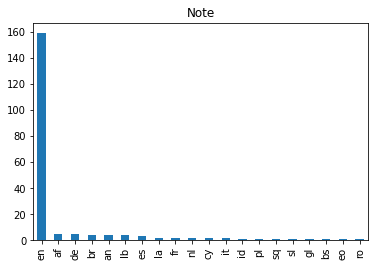

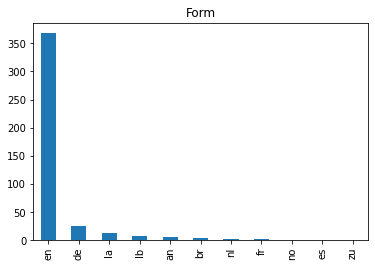

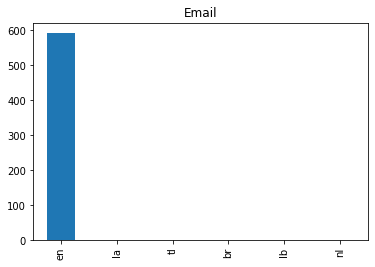

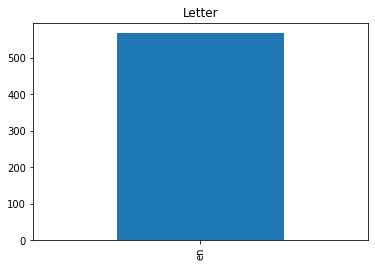

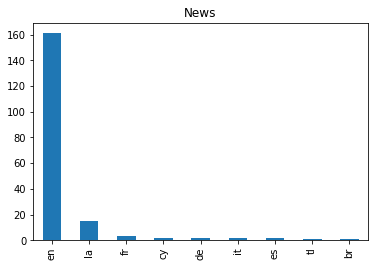

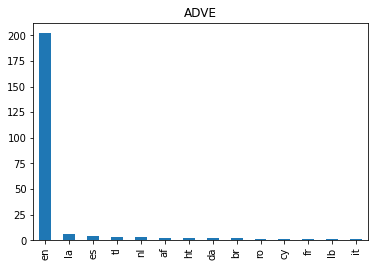

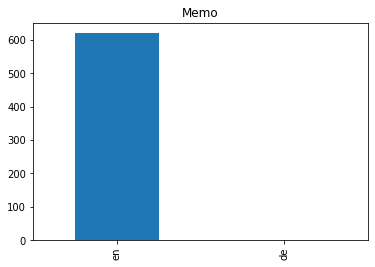

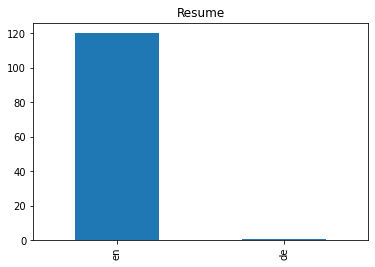

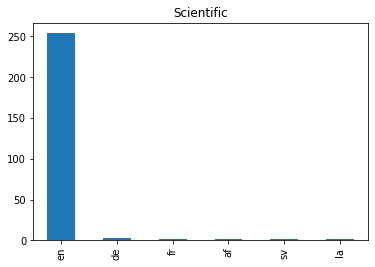

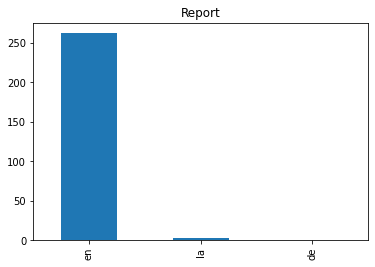

In [ ]:
# viewing the distribution of languages for each label

for label in list(imgpath_text_df['label'].unique()):
  print('\nFor '+label+':\n')
  temp_df = imgpath_text_df[imgpath_text_df['label']==label]
  plt.figure()
  display(temp_df['language'].value_counts())
  temp_df['language'].value_counts().plot(kind='bar',title=label)

**Since the dataset contains mixed languages and there share is not significant, I will be removing those columns**

In [ ]:
# filtering the dataset to get only images with english text
imgpath_text_df_en = imgpath_text_df[imgpath_text_df['language']=='en'].copy()

# viewing the first five rows
display(imgpath_text_df_en.head())

# confirming that the filtering was done properly
display(imgpath_text_df_en['language'].value_counts())

,label,path,text,clean_text,language,lang_prob
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.0
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.0
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.0
6,Note,/content/Dataset/Note/0000007194.jpg,\n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...,ceol cll sy cck boi jo chance hos recordive ch...,en,1.0
8,Note,/content/Dataset/Note/2064984702.jpg,\n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...,paula desel py pe ayes hate gst ee fxr upc lo ...,en,1.0


en    3306
Name: language, dtype: int64

##**Removing StopWords**

In [ ]:
imgpath_text_df_en['clean_text_without_stopwords'] = [remove_stopwords(text) for text in imgpath_text_df_en['clean_text']]
display(imgpath_text_df_en.head())

,label,path,text,clean_text,language,lang_prob,clean_text_without_stopwords
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.0,ppd ay pid cane cirneten pp mae pf e aep tharj...
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.0,produc ed b w web site health policy center dr...
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.0,slzese stupts cover bu faw froo o lavwel wit c...
6,Note,/content/Dataset/Note/0000007194.jpg,\n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...,ceol cll sy cck boi jo chance hos recordive ch...,en,1.0,ceol cll sy cck boi jo chance hos recordive ch...
8,Note,/content/Dataset/Note/2064984702.jpg,\n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...,paula desel py pe ayes hate gst ee fxr upc lo ...,en,1.0,paula desel py pe ayes hate gst ee fxr upc lo ...


##**Viewing the length of text**

###**Viewing collective statistics**

In [ ]:
imgpath_text_df_en['text_length'] = [len(text) for text in imgpath_text_df_en['clean_text_without_stopwords']]
display(imgpath_text_df_en.head())

,label,path,text,clean_text,language,lang_prob,clean_text_without_stopwords,text_length
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.0,ppd ay pid cane cirneten pp mae pf e aep tharj...,131
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.0,produc ed b w web site health policy center dr...,231
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.0,slzese stupts cover bu faw froo o lavwel wit c...,240
6,Note,/content/Dataset/Note/0000007194.jpg,\n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...,ceol cll sy cck boi jo chance hos recordive ch...,en,1.0,ceol cll sy cck boi jo chance hos recordive ch...,450
8,Note,/content/Dataset/Note/2064984702.jpg,\n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...,paula desel py pe ayes hate gst ee fxr upc lo ...,en,1.0,paula desel py pe ayes hate gst ee fxr upc lo ...,129


count    3306.000000
mean      969.424077
std       856.330237
min         0.000000
25%       378.250000
50%       758.500000
75%      1261.750000
max      6643.000000
Name: text_length, dtype: float64

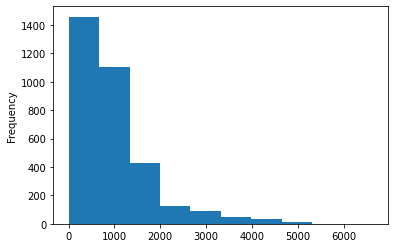

In [ ]:
display(imgpath_text_df_en['text_length'].describe())
imgpath_text_df_en['text_length'].plot(kind='hist')

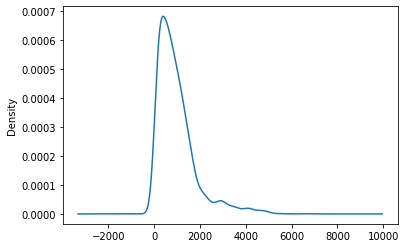

In [ ]:
imgpath_text_df_en['text_length'].plot(kind='kde')

###**Viewing text length statistics for each label**

count     159.000000
mean      217.698113
std       290.227666
min         0.000000
25%        57.000000
50%       131.000000
75%       245.000000
max      1806.000000
Name: text_length, dtype: float64

count     368.000000
mean      692.654891
std       401.794317
min         0.000000
25%       401.750000
50%       634.500000
75%       877.000000
max      3069.000000
Name: text_length, dtype: float64

count     592.000000
mean      444.871622
std       360.173206
min         0.000000
25%       189.750000
50%       309.000000
75%       594.000000
max      1801.000000
Name: text_length, dtype: float64

count     568.000000
mean      944.441901
std       399.756156
min         0.000000
25%       645.000000
50%       900.500000
75%      1218.500000
max      2293.000000
Name: text_length, dtype: float64

count     161.000000
mean     2521.770186
std      1235.599714
min         0.000000
25%      1628.000000
50%      2505.000000
75%      3345.000000
max      6643.000000
Name: text_length, dtype: float64

count     202.000000
mean      456.970297
std       636.986312
min         0.000000
25%       133.250000
50%       220.000000
75%       522.750000
max      5131.000000
Name: text_length, dtype: float64

count     620.000000
mean      882.882258
std       427.724203
min         0.000000
25%       529.000000
50%       825.500000
75%      1187.000000
max      2426.000000
Name: text_length, dtype: float64

count     120.000000
mean     2018.783333
std       846.685432
min         0.000000
25%      1316.250000
50%      2114.000000
75%      2724.000000
max      3977.000000
Name: text_length, dtype: float64

count     254.000000
mean     1935.610236
std      1353.594986
min         0.000000
25%       833.000000
50%      1532.500000
75%      2963.000000
max      5066.000000
Name: text_length, dtype: float64

count     262.000000
mean     1282.438931
std       532.190934
min         0.000000
25%       943.250000
50%      1255.500000
75%      1552.000000
max      5707.000000
Name: text_length, dtype: float64

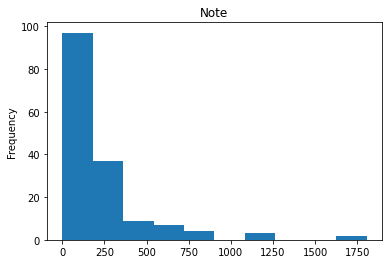

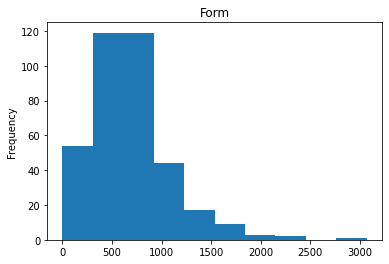

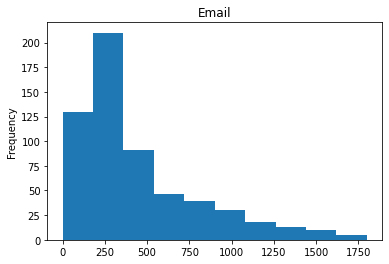

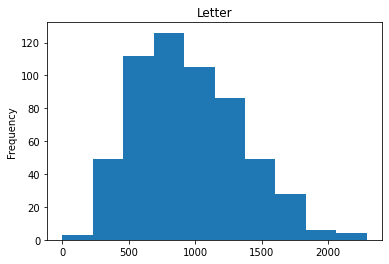

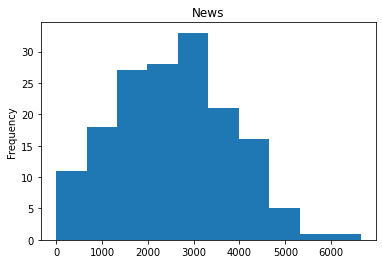

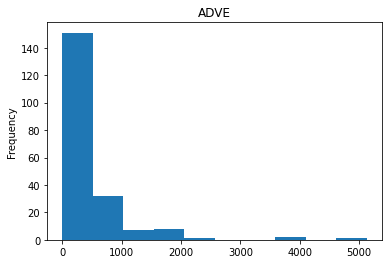

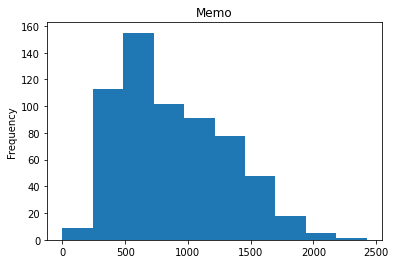

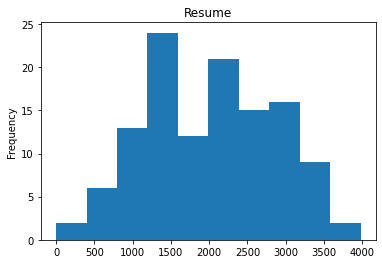

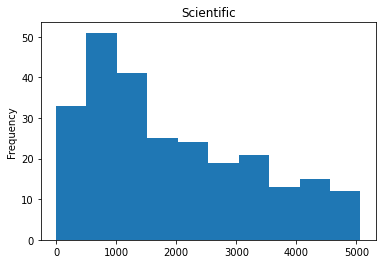

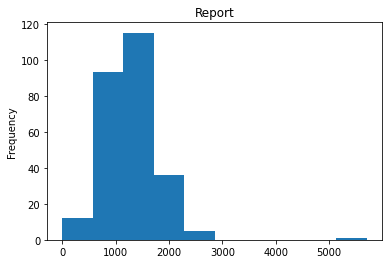

In [ ]:
for label in list(imgpath_text_df_en['label'].unique()):
  temp_df = imgpath_text_df_en[imgpath_text_df_en['label']==label]
  print('\n')
  display(temp_df['text_length'].describe())
  plt.figure()
  temp_df['text_length'].plot(kind='hist',title=label)

###**Getting maximum and minimum text length for each label**

####**Maximum text length**

,text_length
label,
ADVE,5131
Email,1801
Form,3069
Letter,2293
Memo,2426
News,6643
Note,1806
Report,5707
Resume,3977


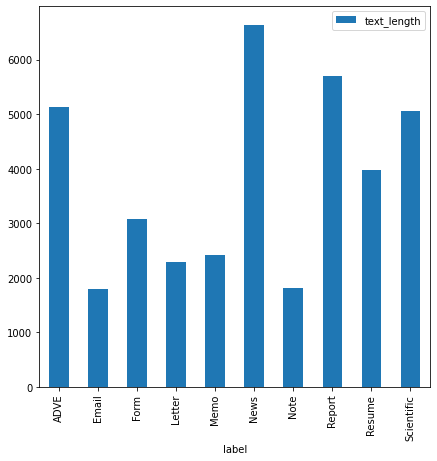

In [ ]:
# grouping by and plotting maximum text length for each type of image
df_tl_temp = imgpath_text_df_en[['label','text_length']]
t = df_tl_temp.groupby('label').agg('max')
display(t)
t.plot(kind='bar',figsize=(7,7))

,text_length
label,
ADVE,21
Email,16
Form,67
Letter,194
Memo,13
News,71
Note,2
Report,389
Resume,236


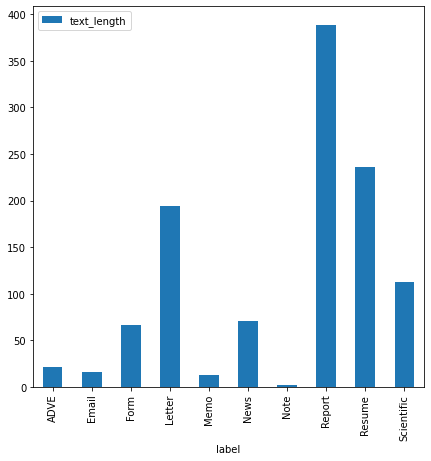

In [ ]:
# grouping by and plotting minimum text length for each type of image
df_tl_temp = imgpath_text_df_en[['label','text_length']][imgpath_text_df_en['text_length']!=0]
t = df_tl_temp.groupby('label').agg('min')
display(t)
t.plot(kind='bar',figsize=(7,7))

##**Generating Word Clouds**

###**Generating collective word cloud**

In [ ]:
# Defining a function to plot word cloud
def wordcloud_plot_c(wordcloud):
  # Set figure size
  plt.figure(figsize=(10, 10))
  # Display image
  plt.imshow(wordcloud) 
  # No axis details
  plt.axis("off");

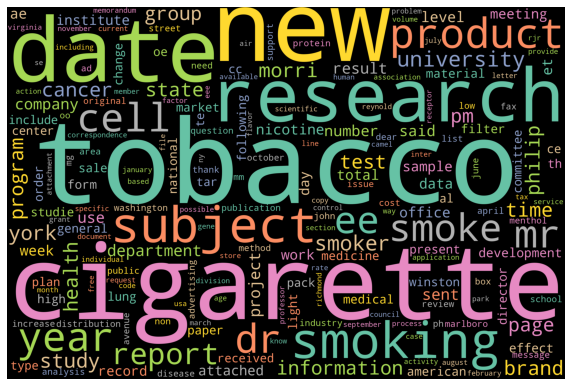

In [ ]:
wordcloud_text_all = " ".join(imgpath_text_df_en['clean_text_without_stopwords'])
wordcloud_all = WordCloud(width = 3000,
                      height = 2000,
                      random_state=1,
                      background_color='black',
                      colormap='Set2',
                      collocations=False,
                      stopwords = STOPWORDS).generate(wordcloud_text_all)
# Plotting the word cloud
wordcloud_plot_c(wordcloud_all)

###**Generating Word Cloud for each label**

In [ ]:
# creating list of labels for creating wordcloud in iterations for each label
labels = list(imgpath_text_df_en['label'].unique())
display(labels)

['Note',
 'Form',
 'Email',
 'Letter',
 'News',
 'ADVE',
 'Memo',
 'Resume',
 'Scientific',
 'Report']

In [ ]:
# Defining a function to plot word cloud
def wordcloud_plot(wordcloud,label):
  # Set figure size
  plt.figure(figsize=(10, 10))
  plt.title('For '+label+':')
  # Display image
  plt.imshow(wordcloud)
  # No axis details
  plt.axis("off");

  0%|          | 0/10 [00:00<?, ?it/s]

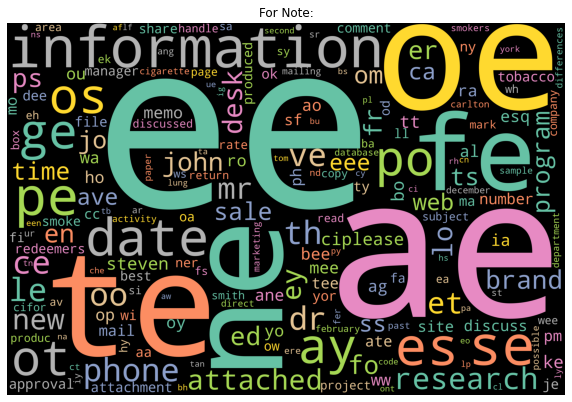

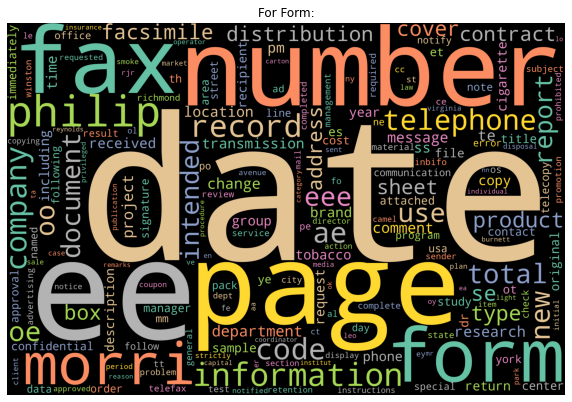

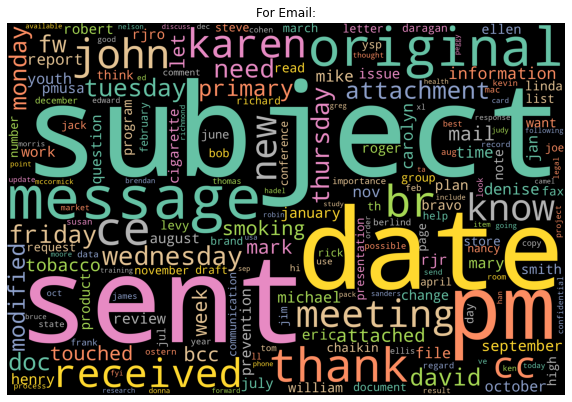

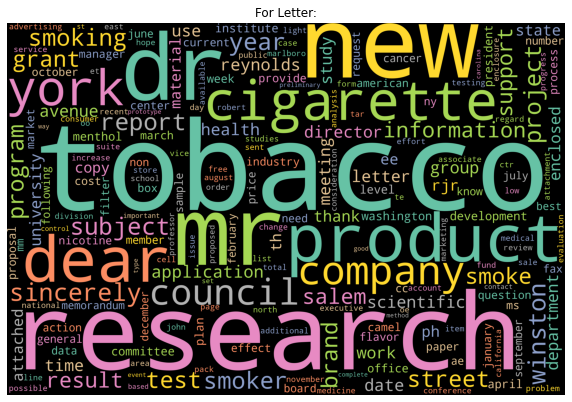

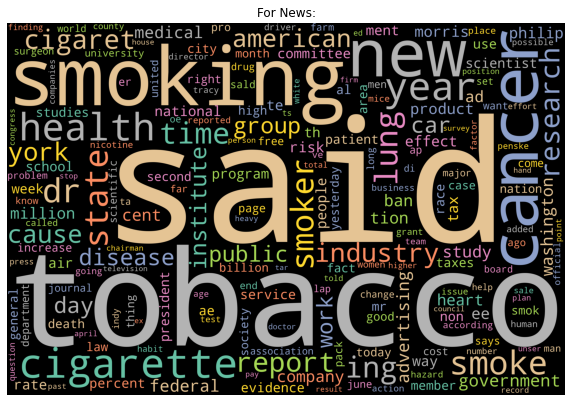

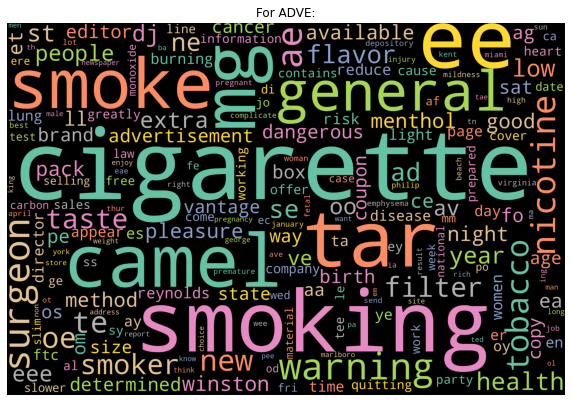

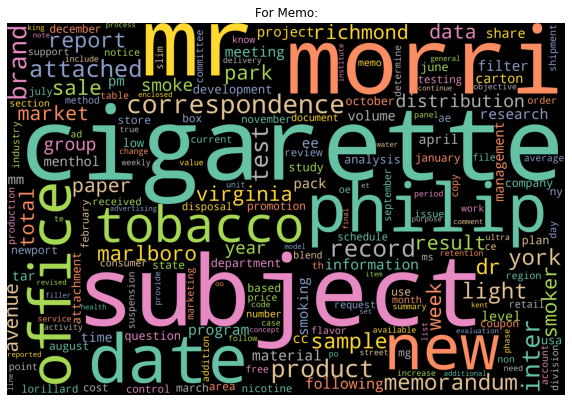

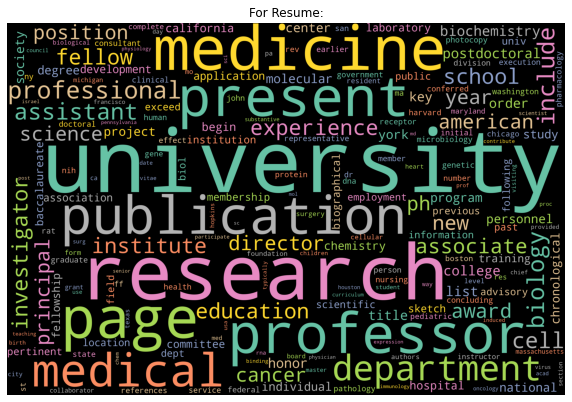

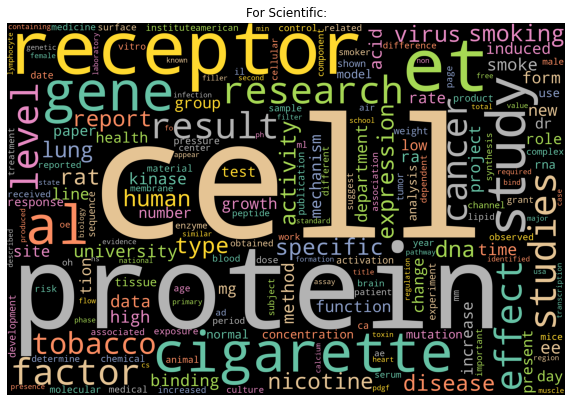

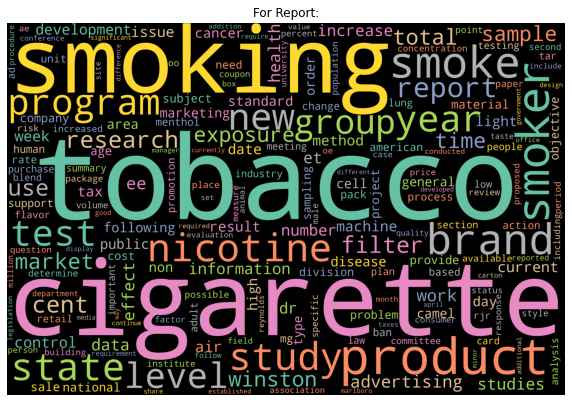

In [ ]:
for label in tqdm(labels):
  wordcloud_text = " ".join(imgpath_text_df_en[imgpath_text_df_en['label']==label]['clean_text_without_stopwords'])
  wordcloud = WordCloud(width = 3000,
                        height = 2000,
                        random_state=1,
                        background_color='black',
                        colormap='Set2',
                        collocations=False,
                        stopwords = STOPWORDS).generate(wordcloud_text)
  # Plotting the word cloud
  wordcloud_plot(wordcloud,label)